In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def explore(file, slc, ax, x, y, col):
    d = pd.read_csv(file, skiprows=list(range(20)))
    sample_ch1 = d.iloc[slc[0]:slc[1],col]
    ax[x,y].plot(sample_ch1)
    
    sample_ch1 = np.array(sample_ch1)
    sample_ch1 = np.reshape(sample_ch1, (-1,1))
    
    return sample_ch1


FileNotFoundError: [Errno 2] No such file or directory: '0_c2264c30c100.csv'

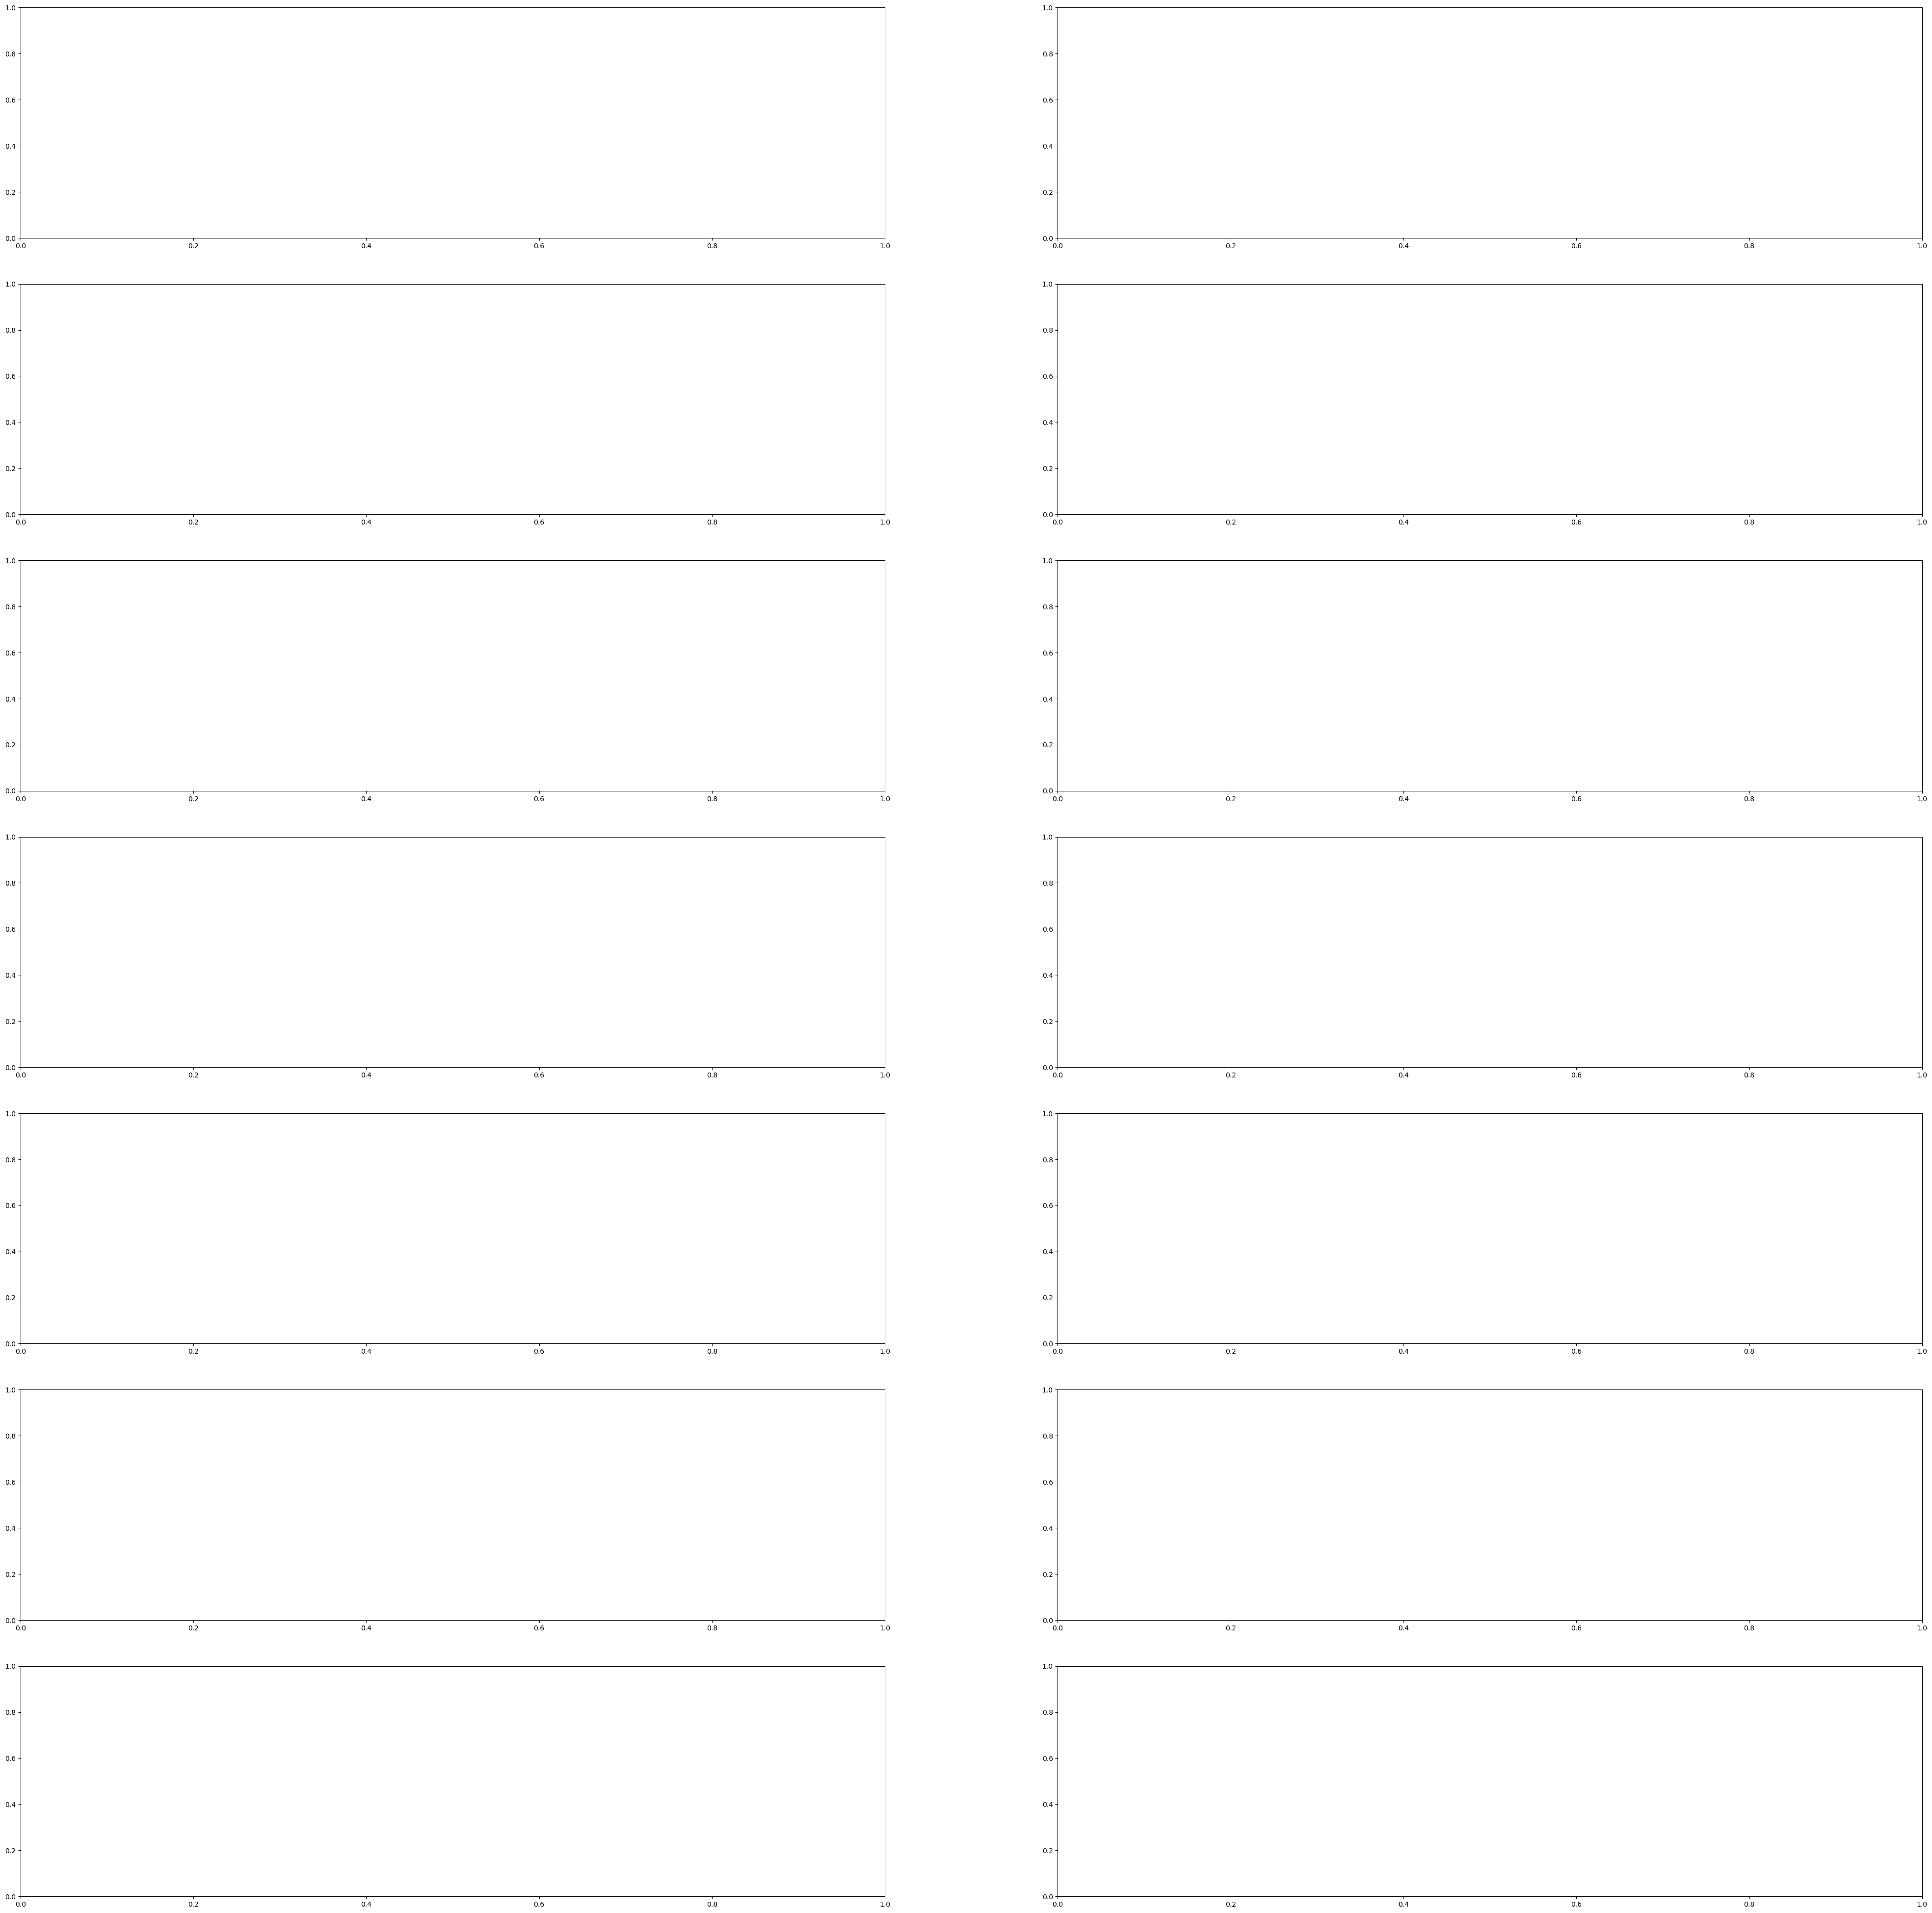

In [7]:
fig, ax = plt.subplots(7,2, figsize = (50,50))

col = 1

sample00_ch1 = explore("0_c2264c30c100..csv",(0,1000), ax, 0,0,col)
sample01_ch1 = explore("0_c2264c30c100.csv",(50000,51000), ax, 0,1,col)
"""
sample10_ch1 = explore("1_c0000c30c100.csv",(0,1000), ax, 6,0,col)
sample11_ch1 = explore("1_c0000c30c100.csv",(50000,51000), ax,6,1,col)

sample20_ch1 = explore("2_c0759c30c100.csv",(0,1000), ax, 2,0,col)
sample21_ch1 = explore("2_c0759c30c100.csv",(50000,51000), ax, 2,1,col)

sample30_ch1 = explore("3_c1513c30c100.csv",(0,1000), ax, 3,0,col)
sample31_ch1 = explore("3_c1513c30c100.csv",(50000,51000), ax, 3,1,col)

sample40_ch1 = explore("4_c0017c30c100.csv",(0,1000), ax, 4,0,col)
sample41_ch1 = explore("4_c0017c30c100.csv",(50000,51000), ax, 4,1,col)

sample50_ch1 = explore("5_c0776c30c100.csv",(0,1000), ax, 5,0,col)
sample51_ch1 = explore("5_c0776c30c100.csv",(50000,51000), ax, 5,1,col)

sample60_ch1 = explore("6_c1528c30c100.csv",(0,1000), ax, 1,0,col)
sample61_ch1 = explore("6_c1528c30c100.csv",(50000,51000), ax, 1,1,col)
"""

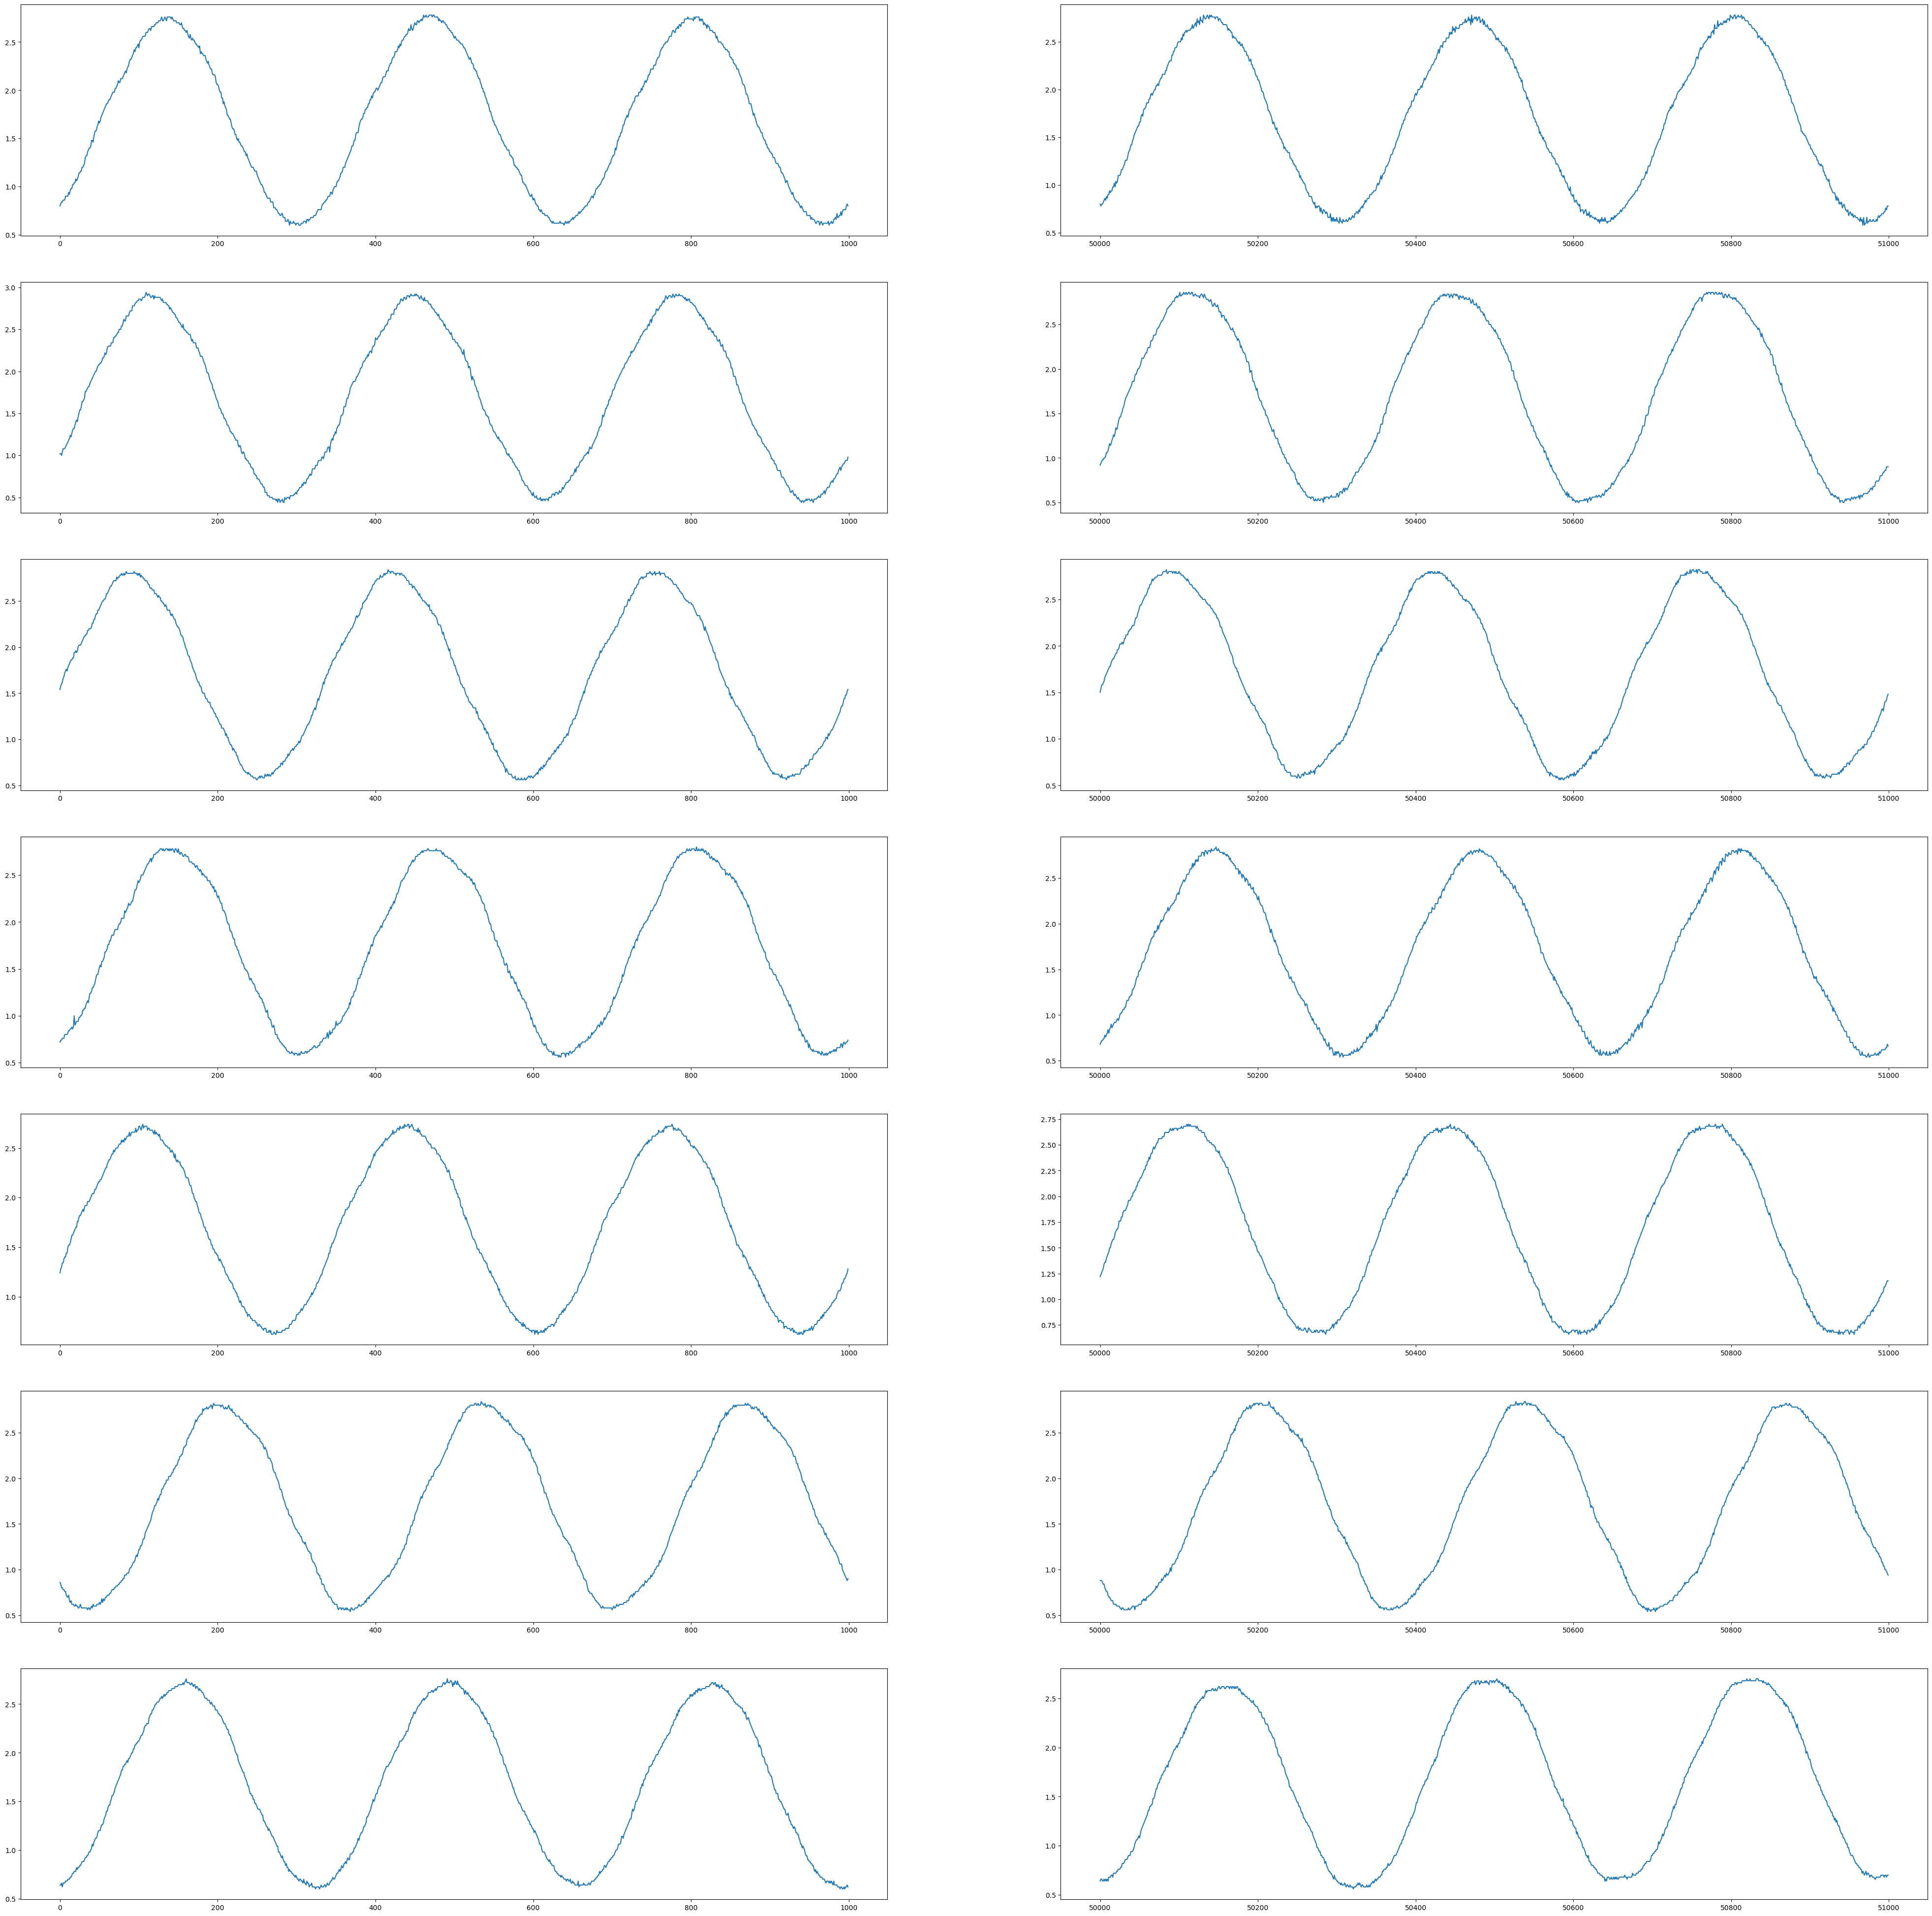

In [23]:
fig, ax = plt.subplots(7,2, figsize = (50,50))

col = 3

sample00_ch1 = explore("0_c2264c30c100.csv",(0,1000), ax, 0,0,col)
sample01_ch1 = explore("0_c2264c30c100.csv",(50000,51000), ax, 0,1,col)

sample10_ch1 = explore("1_c0000c30c100.csv",(0,1000), ax, 6,0,col)
sample11_ch1 = explore("1_c0000c30c100.csv",(50000,51000), ax,6,1,col)

sample20_ch1 = explore("2_c0759c30c100.csv",(0,1000), ax, 2,0,col)
sample21_ch1 = explore("2_c0759c30c100.csv",(50000,51000), ax, 2,1,col)

sample30_ch1 = explore("3_c1513c30c100.csv",(0,1000), ax, 3,0,col)
sample31_ch1 = explore("3_c1513c30c100.csv",(50000,51000), ax, 3,1,col)

sample40_ch1 = explore("4_c0017c30c100.csv",(0,1000), ax, 4,0,col)
sample41_ch1 = explore("4_c0017c30c100.csv",(50000,51000), ax, 4,1,col)

sample50_ch1 = explore("5_c0776c30c100.csv",(0,1000), ax, 5,0,col)
sample51_ch1 = explore("5_c0776c30c100.csv",(50000,51000), ax, 5,1,col)

sample60_ch1 = explore("6_c1528c30c100.csv",(0,1000), ax, 1,0,col)
sample61_ch1 = explore("6_c1528c30c100.csv",(50000,51000), ax, 1,1,col)

In [4]:
import scipy.fft as fft

C:\Users\Lohith\miniconda3\envs\GPU\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


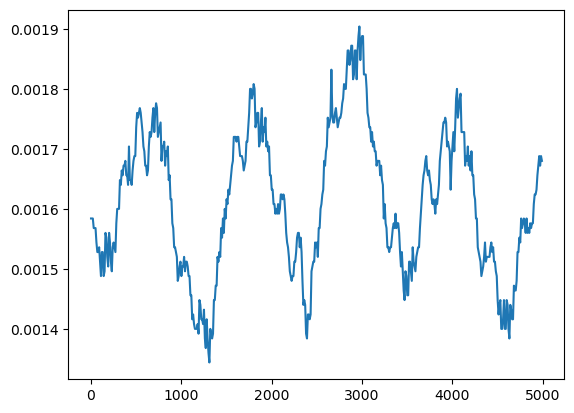

In [17]:
Fs = 10000
Ts = 1.0/Fs
t = np.arange(0,1.0,Ts)

y = sample00_ch1

n = len(y)
k = np.arange(n)
T = n/Fs
frq = k/T
frq = frq[:len(frq)//2]

Y = np.fft.fft(y)/n
Y = Y[:n//2]

plt.plot(frq, Y)

In [6]:
import tensorflow as tf

X = np.arange(len(sample00_ch1))/10000
X = np.reshape(X, (-1,1))

X = tf.Tensor(X, dtype=tf.float32)

TypeError: __init__() missing 1 required positional argument: 'value_index'

In [ ]:
class myNN:
    def __init__(self):
        #self.l1 = np.random.random((1,2))
        self.l1 = tf.Tensor(np.array([[1,0]]), dtype=tf.float32)
        #self.l2 = np.random.random((1,2))
        self.l2 = tf.Tensor(np.array([[1,0]]), dtype=tf.float32)
        
    def forward(self, X):
        X = tf.concat((X, tf.ones((X.shape[0], 1))), axis = 1)
        X = X @ self.l1.T
        X = np.sin(X)
        
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
        X = X @ self.l2.T
        
        return X
    
    def backward(self, X, Y):
        gl1 = tf.GradientTape()
        gl2 = tf.GradientTape()
        
        gl1.watch(self.l1)
        gl2.watch(self.l2)
        
        pred = self.forward(X)
        err = pred - Y
        dl1 = gl1.gradient(err, self.l1)
        dl2 = gl2.gradient(err, self.l2)
        
        self.l1 -= dl1
        self.l2 -= dl2
        
        return err
            
            
            
    
    

In [ ]:
n = myNN()

In [ ]:
y = n.backward(X, sample00_ch1)

In [ ]:
plt.plot(X, y)